# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

This project aims to develop a supervised learning model (soecifically, a regression model) to predict the target variable `price` using the available attributes in the used car dataset (e.g., year, region, model, and additional features). By training and evaluating this model on historical data, we will not only estimate car prices but also identify the various factors that make a car more or less expensive.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [187]:
import sys
!{sys.executable} -m pip install --upgrade category_encoders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute       import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer, TransformedTargetRegressor
from sklearn.ensemble      import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model     import LinearRegression, Ridge, Lasso
from sklearn.utils import Tags
from category_encoders import TargetEncoder
from sklearn.metrics          import mean_squared_error

# Load data
df = pd.read_csv('./data/vehicles.csv')
df.head(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [4]:
# Analyze missing values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
id               0.000000
region           0.000000
price            0.000000
state            0.000000
dtype: float64

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

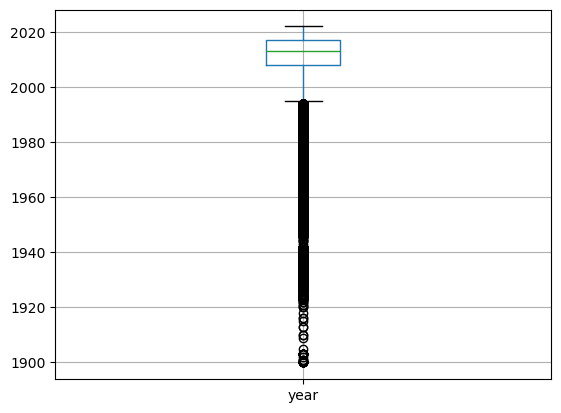

In [10]:
df[['year']].boxplot()
plt.show()

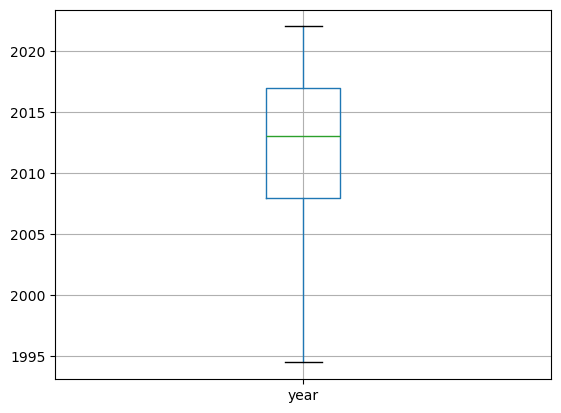

In [11]:
# Cleaning outliers from year column
# Applying IQR to detect outliers and remove them 

# Calculate Interquartile range
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Define the outliers cutoffs
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# clip outliers
df['year'] = df['year'].clip(lower_bound, upper_bound)
df[['year']].boxplot()
plt.show()

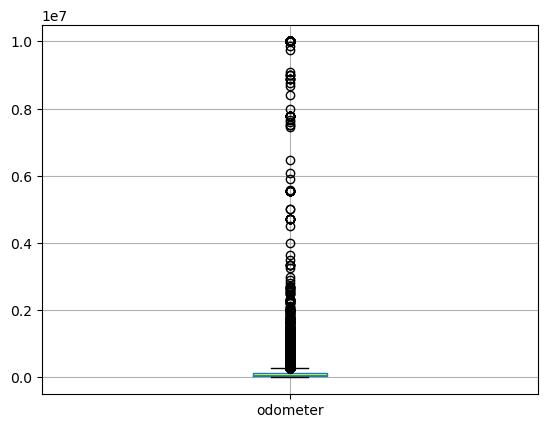

In [14]:
df[['odometer']].boxplot()
plt.show()

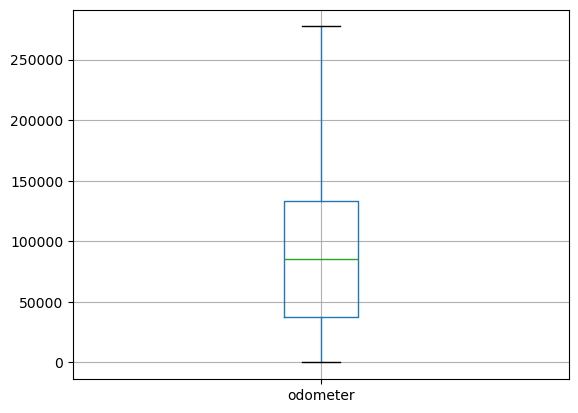

In [16]:
# Cleaning outliers from odometer column
# Applying IQR to detect outliers and remove them 

# Calculate Interquartile range
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1

# Define the outliers cutoffs
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# clip outliers
df['odometer'] = df['odometer'].clip(lower_bound, upper_bound)
df[['odometer']].boxplot()
plt.show()

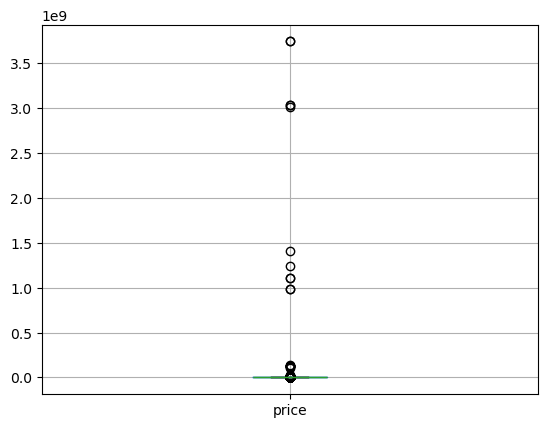

In [18]:
df[['price']].boxplot()
plt.show()

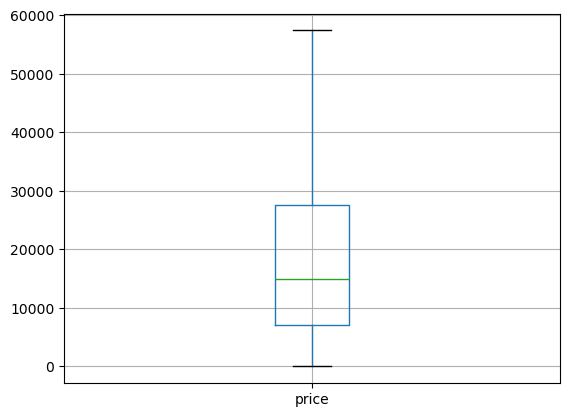

count    393985.000000
mean      18558.699104
std       13836.265959
min           1.000000
25%        7000.000000
50%       15000.000000
75%       27590.000000
max       57364.375000
Name: price, dtype: float64

In [20]:
# Cleaning outliers from price column
# Applying IQR to detect outliers and remove them 

# Calculate Interquartile range
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outliers cutoffs
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# clip outliers
df['price'] = df['price'].clip(lower_bound, upper_bound)
# remove 0 dollar price

df = df[df['price'] > 0]

df[['price']].boxplot()
plt.show()
df['price'].describe()

In [22]:
# Dropping columns that are not relevant to price prediction
df.drop(['id', 'VIN'], axis=1, inplace=True)

In [24]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

size            71.813140
cylinders       40.714748
condition       38.425067
drive           30.522482
paint_color     29.734381
type            21.810983
manufacturer     4.108024
title_status     1.963019
model            1.193193
fuel             0.658401
odometer         0.581240
transmission     0.462708
year             0.297727
region           0.000000
price            0.000000
state            0.000000
dtype: float64

In [26]:
# Handling Size column
# Although it could be a driving factor, 72% of it is missing is it way to much!
# Dropping the column as well
df.drop(['size'], axis=1, inplace=True)

In [28]:
# Handling condition, cylinders, drive, paint_color, type, manufacturer, title_status, model, fuel and transmission columns
# Replacing missing values with 'unknown'

df['condition'] = df['condition'].fillna('unknown')
df['drive'] = df['drive'].fillna('unknown')
df['paint_color'] = df['paint_color'].fillna('unknown')
df['type'] = df['type'].fillna('unknown')
df['manufacturer'] = df['manufacturer'].fillna('unknown')
df['title_status'] = df['title_status'].fillna('unknown')
df['model'] = df['model'].fillna('unknown')
df['fuel'] = df['fuel'].fillna('unknown')
df['transmission'] = df['title_status'].fillna('unknown')
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

cylinders       40.714748
odometer         0.581240
year             0.297727
region           0.000000
price            0.000000
manufacturer     0.000000
model            0.000000
condition        0.000000
fuel             0.000000
title_status     0.000000
transmission     0.000000
drive            0.000000
type             0.000000
paint_color      0.000000
state            0.000000
dtype: float64

In [30]:
df.select_dtypes(include=['object', 'category']).nunique()


region            404
manufacturer       43
model           28265
condition           7
cylinders           8
fuel                6
title_status        7
transmission        7
drive               4
type               14
paint_color        13
state              51
dtype: int64

In [32]:
# convert cylinders into numerical column
cyl = df['cylinders'].str.extract(r'(\d+)', expand=False).astype(float)
med = cyl.median()
df['cylinders'] = cyl.fillna(med)

In [34]:
df['condition'].unique()

array(['unknown', 'good', 'excellent', 'fair', 'like new', 'new',
       'salvage'], dtype=object)

In [36]:
# separate categorical columns based on their transformation methods

target_cols = ['model', 'manufacturer', 'region']
onehot_cols = ['fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
numeric_cols = ['cylinders', 'year', 'odometer']

ordinal_cols = ['condition']
condition_order = [['unknown', 'salvage', 'fair', 'good', 'excellent', 'like new', 'new']]

# transformers

te = TargetEncoder(cols=target_cols, smoothing=0.5, min_samples_leaf=100)
oh = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ord_enc = OrdinalEncoder(categories=condition_order, dtype=int)
num_imp = IterativeImputer(random_state=42, max_iter=10)

preprocessor = ColumnTransformer([
    ('target', te, target_cols),
    ('onehot', oh, onehot_cols),
    ('ordinal', ord_enc, ordinal_cols),
    ('num', num_imp, numeric_cols)
])

In [38]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [41]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42, max_iter=10_000),
    'RandomForest (100 trees)': RandomForestRegressor(n_estimators=100, random_state=42),
    'GBR (100 trees)'         : GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [117]:
# Baseline with no tunning
for name, estimator in models.items():
    base_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', estimator)
    ])

    log_pipe = TransformedTargetRegressor(
        regressor=base_pipe,
        func=np.log1p,
        inverse_func=np.expm1
        )
    
    cv_scores = -cross_val_score(
        log_pipe,
        X_train, y_train,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    cv_rmse = cv_scores.mean()

    log_pipe.fit(X_train, y_train)
    y_pred = log_pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(mse)                         
    print(f"{name:25s}  CV RMSE = {cv_rmse:,.0f}  |  Test RMSE = {test_rmse:,.0f}")

LinearRegression           CV RMSE = 9,922  |  Test RMSE = 9,963
Ridge                      CV RMSE = 9,922  |  Test RMSE = 9,963
Lasso                      CV RMSE = 11,313  |  Test RMSE = 11,201
RandomForest (100 trees)   CV RMSE = 5,756  |  Test RMSE = 5,554
GBR (100 trees)            CV RMSE = 8,787  |  Test RMSE = 8,737


In [504]:
## Increasing dimensionality

In [107]:
poly_degree = 2
num_pipe_with_poly = Pipeline([
    ('impute', IterativeImputer(random_state=42, max_iter=10)),
    ('scale',  StandardScaler()),
    ('poly',   PolynomialFeatures(degree=poly_degree, include_bias=False)),
])

preprocessor_poly = ColumnTransformer([
    ('target', te, target_cols),
    ('onehot', oh, onehot_cols),
    ('ordinal', ord_enc, ordinal_cols),
    ('num', num_pipe_with_poly, numeric_cols)
])

base_pipe_poly_lr = Pipeline([
    ('pre', preprocessor_poly),
    ('lr',  LinearRegression()),
])

log_pipe_poly = TransformedTargetRegressor(
        regressor=base_pipe_poly_lr,
        func=np.log1p,
        inverse_func=np.expm1
        )

cv_scores = -cross_val_score(
    log_pipe_poly, X_train, y_train,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
print(f"Poly‑deg {poly_degree} Linear CV RMSE: {cv_scores.mean():,.0f}  (std {cv_scores.std():.0f})")

log_pipe_poly.fit(X_train, y_train)
y_pred = log_pipe_poly.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Poly‑deg {poly_degree} Linear Test RMSE: {test_rmse:,.0f}")

Poly‑deg 2 Linear CV RMSE: 9,777  (std 54)
Poly‑deg 2 Linear Test RMSE: 9,816


In [508]:
# Trying with same dimensionality and regularization

In [113]:
base_pipe_ridge = Pipeline([
    ('pre', preprocessor_poly),
    ('ridge', Ridge(random_state=42))
])

log_pipe_ridge = TransformedTargetRegressor(
        regressor=base_pipe_ridge,
        func=np.log1p,
        inverse_func=np.expm1
        )

param_grid = {
    'regressor__ridge__alpha': [0.1, 1, 10, 100]
}
gs = GridSearchCV(log_pipe_ridge, 
                  param_grid,
                  cv=5,
                  scoring='neg_root_mean_squared_error',
                  n_jobs=-1
                 )
gs.fit(X_train, y_train)
print("Best α:", gs.best_params_['regressor__ridge__alpha'])
print("CV RMSE:", -gs.best_score_)

best = gs.best_estimator_
y_pred = best.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Best α: 100
CV RMSE: 9767.863501087804
Test RMSE: 9808.234612668648


In [ ]:
## Hyperparameter Tuning for Random Forest

In [44]:
rf_pipe = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid = {
    'rf__n_estimators'    : randint(100, 500),
    'rf__max_depth'       : [None, 10, 20, 30],
    'rf__min_samples_leaf': randint(1, 10),
}

rs = RandomizedSearchCV(
    rf_pipe, 
    param_grid, 
    n_iter=10,
    cv=3, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1,
    random_state=42,
    verbose=2
)
rs.fit(X_train, y_train)
print("Best RF params:", rs.best_params_)
print("RF CV RMSE:", -rs.best_score_)

y_pred = rs.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RF Test RMSE:", 
      test_rmse)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END rf__max_depth=None, rf__min_samples_leaf=7, rf__n_estimators=221; total time= 9.2min
[CV] END rf__max_depth=20, rf__min_samples_leaf=7, rf__n_estimators=430; total time=136.6min


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END rf__max_depth=20, rf__min_samples_leaf=8, rf__n_estimators=288; total time=26.6min
[CV] END rf__max_depth=20, rf__min_samples_leaf=7, rf__n_estimators=430; total time=121.3min
[CV] END rf__max_depth=20, rf__min_samples_leaf=6, rf__n_estimators=408; total time=31.8min
[CV] END rf__max_depth=None, rf__min_samples_leaf=7, rf__n_estimators=221; total time= 9.2min
[CV] END rf__max_depth=None, rf__min_samples_leaf=7, rf__n_estimators=221; total time=86.4min
[CV] END rf__max_depth=20, rf__min_samples_leaf=8, rf__n_estimators=472; total time=67.2min
[CV] END rf__max_depth=10, rf__min_samples_leaf=5, rf__n_estimators=260; total time=17.0min
[CV] END rf__max_depth=20, rf__min_samples_leaf=8, rf__n_estimators=288; total time=26.6min
[CV] END rf__max_depth=20, rf__min_samples_leaf=7, rf__n_estimators=430; total time=121.2min
[CV] END rf__max_depth=20, rf__min_samples_leaf=6, rf__n_estimators=408; total time=32.0min
[CV] END rf__max_depth=20, rf__min_samples_leaf=4, rf__n_estimators=448; t

RF Test RMSE: 5218.167048604538


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.